## Raw MRI data visualizations

The exact mpMRI scans included are:
- Fluid Attenuated Inversion Recovery (FLAIR)
- T1-weighted pre-contrast (T1w)
- T1-weighted post-contrast (T1Gd)
- T2-weighted (T2)

Load packages

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
from ipywidgets import interact, interactive, IntSlider, ToggleButtons


Load data

In [14]:
# define path
base_path = '../data/BRaTS2021/BRaTS2021_raw/' 
sample_id = '00128'

path = base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_flair.nii.gz'

print(path)

flair   = nib.load(base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_flair.nii.gz')
seg     = nib.load(base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_seg.nii.gz')
T1      = nib.load(base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_t1.nii.gz')
T1ce    = nib.load(base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_t1ce.nii.gz')
T2      = nib.load(base_path  + 'BraTS2021_' + sample_id  + '/BraTS2021_' + sample_id + '_t2.nii.gz')

# print number of slices
imgshape = flair.shape
print(f"Image resolution: {imgshape[0]}x{imgshape[1]}")
print(f"Number of slices: {imgshape[2]}")

../data/BRaTS2021/BRaTS2021_raw/BraTS2021_00128/BraTS2021_00128_flair.nii.gz
Image resolution: 240x240
Number of slices: 155


In [15]:
flair_data = flair.get_fdata()
mask = seg.get_fdata()

# print image datatype
print(f"Image datatype: {flair_data.dtype}")
print(type(flair_data))

Image datatype: float64
<class 'numpy.ndarray'>


Visualize segmentation

In [22]:
classes_dict = {
    0 : 'B/W = healthy',
    1 : 'Red = necrotic',
    2 : 'Green = edematous',
    4 : 'Blue = enhancing'
}

def visualize_3d_labels(layer):
    # change colours of segmentation result    
    
    color_segmentation = np.zeros((240, 240, 3), dtype=int)
    gray_segmentation = mask[:, :, layer]

    # print segmentation result
    print([classes_dict[int(result)] for result in np.unique(gray_segmentation)])
    # print(f"Segmentation result: {[classes_dict[result] for result in np.unique(gray_segmentation)]}")

                                                                # Black (healthy tissue) = 0
    color_segmentation[gray_segmentation == 1] = [255, 0, 0]    # Red (necrotic tumor core) = 1
    color_segmentation[gray_segmentation == 2] = [0, 255,0]     # Green (peritumoral edematous/invaded tissue) = 2
    color_segmentation[gray_segmentation == 4] = [0, 0, 255]    # Blue (enhancing tumor) = 4
 
    plt.figure(figsize=(10, 5))
    
    plt.imshow(flair_data[:, :, layer], cmap='bone');
    # overlay mask
    plt.imshow(color_segmentation, cmap='gray', alpha=0.4)
    plt.axis('off')
    plt.tight_layout()
    return layer

interact(visualize_3d_labels, layer=(0, flair_data.shape[2] - 1));

# in case this does not work, see: https://stackoverflow.com/questions/36351109/ipython-notebook-ipywidgets-does-not-show

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

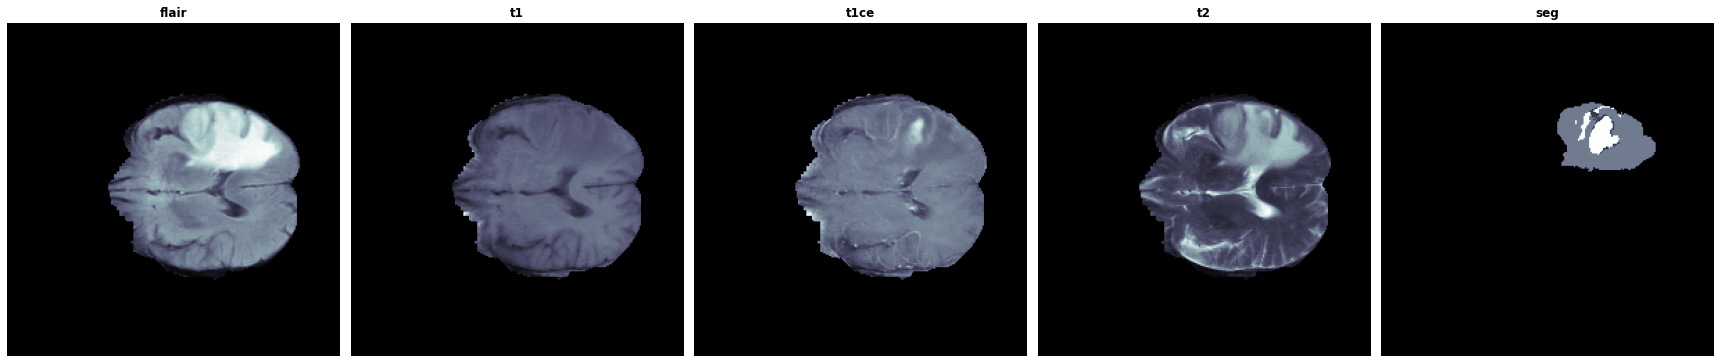

In [17]:
slice = 75
modalities = [f'{base_path}/BraTS2021_{sample_id}/BraTS2021_{sample_id}_{s_type}.nii.gz' for s_type in ["flair", "t1", "t1ce", "t2", "seg"]]

plt.figure(figsize=(24, 8))

for i, nii in enumerate(modalities):
    plt.subplot(1,5,i+1)
    image = nib.load(nii).get_fdata()
    plt.title(nii.rsplit("_", 1)[1].split(".", 1)[0], fontweight="bold")
    plt.axis(False)
    plt.imshow(image[:, :, slice], cmap="bone")
plt.tight_layout()    
plt.show()

Enhancing Tumor [3]

In [18]:
import torch
import torch.nn.functional as F


seg = seg.get_fdata()

# seg[seg == 4] = 3 # convert from 0, 1, 2, 4 --> 0, 1, 2, 3

# convert the segmentation to one-hot encoding, 4 classes: healthy/BG[0], necrotic[1], edema[3], enhancing[2]
y_in = torch.from_numpy(seg).to(torch.int64)
y_one_hot = F.one_hot(y_in, num_classes=4)
print("shape y_one_hot: ", np.shape(y_one_hot))
#y = torch.transpose(y_one_hot, 0, 2)
#print("shape y: ", np.shape(y))
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(y_one_hot[:,:,75 + i,3])
    plt.gcf().set_size_inches(10, 10)
plt.show() 

RuntimeError: Class values must be smaller than num_classes.

edema [2] which is invalid tissue.

In [ ]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(y_one_hot[:,:,75 + i,2])
    plt.gcf().set_size_inches(10, 10)
plt.show() 

Necrotic[1]

In [ ]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(y_one_hot[:,:,75 + i,1])
    plt.gcf().set_size_inches(10, 10)
plt.show() 

Healty class [0]

In [ ]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(y_one_hot[:,:,75 + i,0])
    plt.gcf().set_size_inches(10, 10)
plt.show() 